# ***Projet 05 - Optimisation de gestion de données - BOTTLENECK Fine wine spirit***


---
## Partie 1 - Préparation

### 1. *Import des librairies*
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### *2. Infos sur les fichiers - Préparation*
---

#### *2.1. Export ERP*

In [2]:
# Prix et stock
data_erp = pd.read_excel ('erp.xlsx')
data_erp.head()

C:\Users\david\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [3]:
data_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
# On remarque qu'il n'y a pas de NaN
# Recherche de doublons sur id produit
data_erp.loc[data_erp['product_id'].duplicated(keep = False)]

,product_id,onsale_web,price,stock_quantity,stock_status


In [5]:
# Comptage des id uniques
print('Nombre de product_id unique :', len(data_erp['product_id'].unique()))

Nombre de product_id unique : 825


In [6]:
# df final

In [7]:
# On prend les produits vendus en ligne (pour plus tard)
df_erp_online = data_erp.loc[data_erp['onsale_web'] == 1].copy()
# Reset de l'index et on vire l'ancien pour faire propre
df_erp_online.reset_index(drop = True, inplace = True)
df_erp_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      717 non-null    int64  
 1   onsale_web      717 non-null    int64  
 2   price           717 non-null    float64
 3   stock_quantity  717 non-null    int64  
 4   stock_status    717 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 28.1+ KB


In [8]:
# On prend les produits vendus hors ligne (en magasin physique ?, pour  plus tard aussi)
df_erp_offline = data_erp.loc[data_erp['onsale_web'] == 0].copy()
# On reset l'index et on vire l'ancien pour que ce soit propre
df_erp_offline.reset_index(drop = True, inplace = True)
df_erp_offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      108 non-null    int64  
 1   onsale_web      108 non-null    int64  
 2   price           108 non-null    float64
 3   stock_quantity  108 non-null    int64  
 4   stock_status    108 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ KB


In [9]:
# On prend l'export erp au total (pour mon analyse de base)
df_erp = data_erp.copy()
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


#### *2.2. Export WEB*

In [10]:
# Ventes web
data_web = pd.read_excel ('web.xlsx')
data_web.head(2)

C:\Users\david\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
# Voir quelle colonne correspond à quoi, premières infos sur le dataset
data_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [12]:
# Visu SKU manquants dans le dataset
data_web.loc[data_web['sku'].isna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Nombre de sku manquants et vérification si il y a eu des ventes, important si on veux calculer le CA
print('Il manque :', data_web['sku'].isna().sum(), 'SKU')
vente_na = data_web.loc[data_web['sku'].isna()]
print('Ventes de produits sans SKU :', vente_na['total_sales'].sum())

Il manque : 85 SKU
Ventes de produits sans SKU : 0.0


In [14]:
# On compte les doublons sku et on les met en décroissant pour voir en premier les doublons
print(data_web['sku'].value_counts(dropna = False, ascending = False))

NaN        85
14827.0     2
15526.0     2
16305.0     2
16306.0     2
           ..
15145.0     2
15801.0     2
15452.0     2
15038.0     2
16230.0     2
Name: sku, Length: 715, dtype: int64


In [15]:
# On compte les doublons post_name et on les met en décroissant pour voir en premier les doublons
print(data_web['post_name'].value_counts(dropna = False, ascending = False))

NaN                                                                          83
marc-colin-et-fils-chassagne-montrachet-blanc-les-caillerets-1er-cru-2016     2
pelle-menetou-salon-blanc-ratier-2018                                         2
domaine-bulliat-beaujolais-blanc-2019                                         2
domaine-bulliat-chiroubles-2019                                               2
                                                                             ..
francois-bergeret-hautes-cotes-de-beaune-blanc-2018                           2
gilbert-picq-chablis-vosgros-1er-cru-2017                                     2
bernard-baudry-chinon-rouge-clos-guillot-2017                                 2
pierre-jean-villa-condrieu-suspendu-2018                                      1
pierre-jean-villa-cote-rotie-fongeant-2017                                    1
Name: post_name, Length: 717, dtype: int64


In [16]:
# On fait de même sur post_type
print(data_web['post_type'].value_counts(dropna = False, ascending = False))

product       716
attachment    714
NaN            83
Name: post_type, dtype: int64


In [17]:
# Recherche de doublons dans l'export web complet sur les sku, on remarque doublon entre product et attachment
data_web.loc[data_web['sku'].duplicated(keep = False)].sort_values(by = 'total_sales', ascending = False).head(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
993,7818,0,0,0,0.0,96.0,NaN,NaN,2.0,2018-03-01 14:02:44,...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
197,7818,0,0,0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
870,1662,0,0,0,0.0,87.0,NaN,NaN,2.0,2018-02-13 13:17:25,...,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
72,1662,0,0,0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
31,16416,0,0,0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
829,16416,0,0,0,0.0,62.0,NaN,NaN,2.0,2018-02-12 13:42:28,...,gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
918,16295,0,0,0,0.0,46.0,NaN,NaN,2.0,2018-02-15 14:05:06,...,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
120,16295,0,0,0,0.0,46.0,taxable,NaN,2.0,2018-02-15 14:05:06,...,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
896,16210,0,0,0,0.0,43.0,NaN,NaN,2.0,2018-02-14 16:54:33,...,maurel-pays-oc-chardonnay-2019,2020-08-27 15:35:02,2020-08-27 13:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
98,16210,0,0,0,0.0,43.0,taxable,NaN,2.0,2018-02-14 16:54:33,...,maurel-pays-oc-chardonnay-2019,2020-08-27 15:35:02,2020-08-27 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [18]:
# Premier nettoyage
# On prend uniquement les lignes post_type == product car doublon des sku entre product et attachment, voir ci dessus
df_web = data_web.loc[data_web['post_type'] == 'product'].copy()
# On reset l'index après le slicing
df_web = df_web.reset_index(drop = True)
# On compte le nombre de sku et de product unique
print('Nombre de sku unique :', len(df_web['sku'].unique()))
print('Nombre de product unique :', len(df_web['post_name'].unique()))
print('Nombre entrées sku :', len(df_web['sku']))
df_web.info()

Nombre de sku unique : 715
Nombre de product unique : 716
Nombre entrées sku : 716
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                716 non-null    int64         
 2   downloadable           716 non-null    int64         
 3   rating_count           716 non-null    int64         
 4   average_rating         716 non-null    float64       
 5   total_sales            716 non-null    float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            716 non-null    float64       
 9   post_date              716 non-null    datetime64[ns]
 10  post_date_gmt          716 non-null    datetime64[ns]
 11  post_content           0 non-null      f

In [19]:
# On a 716 entrées, 716 produit uniques mais 715 sku unique, donc il y a encore 1 doublons

In [20]:
# On compte les doublons et on les met en décroissant pour voir en premier les doublons
print(df_web['sku'].value_counts(dropna = False, ascending = False))

NaN        2
14828.0    1
14679.0    1
15526.0    1
16305.0    1
          ..
15145.0    1
15801.0    1
15452.0    1
15038.0    1
16230.0    1
Name: sku, Length: 715, dtype: int64


In [21]:
# Recherche de doublons sur le df sur les sku pour voir comment les traiter
df_web.loc[df_web['sku'].duplicated(keep = False)]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
448,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
449,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
# Traitement des doublons et NaN

In [23]:
# Pour cette étude on peu se permettre de drop les NaN sur sku car pas de vente et pas de moyen de les rapprocher de l'erp
df_web = df_web.dropna(subset = 'sku')
# df final
df_web_final = df_web.copy()

In [24]:
# Nettoyage du header
# Récupération de la liste des entêtes pour le nettoyage
df_web_final.columns.values.tolist()

['sku',
 'virtual',
 'downloadable',
 'rating_count',
 'average_rating',
 'total_sales',
 'tax_status',
 'tax_class',
 'post_author',
 'post_date',
 'post_date_gmt',
 'post_content',
 'post_title',
 'post_excerpt',
 'post_status',
 'comment_status',
 'ping_status',
 'post_password',
 'post_name',
 'post_modified',
 'post_modified_gmt',
 'post_content_filtered',
 'post_parent',
 'guid',
 'menu_order',
 'post_type',
 'post_mime_type',
 'comment_count']

In [25]:
# On vire les colonnes qui ne vont pas servir pour plus de lisibilité
col_del = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_author',
           'post_date_gmt', 'post_content', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_password',
           'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid', 'menu_order', 'post_mime_type', 'comment_count']
df_web_final.drop(col_del, axis=1, inplace=True)
# Visu du df final nettoyé
df_web_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 715
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sku            714 non-null    object        
 1   total_sales    714 non-null    float64       
 2   tax_status     714 non-null    object        
 3   post_date      714 non-null    datetime64[ns]
 4   post_title     714 non-null    object        
 5   post_name      714 non-null    object        
 6   post_modified  714 non-null    datetime64[ns]
 7   post_type      714 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 50.2+ KB


In [26]:
# On vérifie qu'il n'y ai pas de sku = NaN
print('SKU manquants dans le df_web final :', df_web_final['sku'].isna().sum())

SKU manquants dans le df_web final : 0


#### *2.3. Table de liaison*

In [27]:
# Table de liaison entre erp et web
data_link = pd.read_excel ('liaison.xlsx')
# Renommage de la colonne suite remarque stagiaire
data_link.rename(columns = {'id_web (SKU)' : 'sku'}, inplace = True)
data_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


C:\Users\david\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [28]:
# Recherche valeurs manquantes
# Les sku manquants sont des produits qui ne sont pas vendus en ligne (à vérifier)
print('Il manque :', data_link['product_id'].isna().sum(), 'product_id')
print('Il manque :', data_link['sku'].isna().sum(), 'SKU')


Il manque : 0 product_id
Il manque : 91 SKU


In [29]:
# On prend les données tel quel
df_link = data_link.copy()
df_link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [30]:
# On compte les doublons et on les met en décroissant pour voir en premier les doublons
print(df_link['sku'].value_counts(dropna = False, ascending = False))

NaN        91
15298.0     1
16146.0     1
15138.0     1
15753.0     1
           ..
15030.0     1
15875.0     1
16186.0     1
14371.0     1
16230.0     1
Name: sku, Length: 735, dtype: int64


In [31]:
print(df_link['product_id'].value_counts(dropna = False, ascending = False))

3847    1
5610    1
5564    1
5565    1
5566    1
       ..
4635    1
4636    1
4646    1
4647    1
7338    1
Name: product_id, Length: 825, dtype: int64


In [32]:
# on vois que les 91 doublons sur sku sont des NaN
df_link.loc[df_link['sku'].duplicated(keep = False)]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [33]:
# Recherche de doublons sur product_id
df_link.loc[df_link['product_id'].duplicated(keep = False)]

,product_id,sku


In [34]:
# On compte le nombre de sku unique
print('Nombre de sku unique :', len(df_link['sku'].unique())) # Compte un seul NaN comme sku unique
print('Nombre de product_id unique :', len(df_link['product_id'].unique()))

Nombre de sku unique : 735
Nombre de product_id unique : 825


In [35]:
# Traitement des NaN et doublons
# Les doublons sont des NaN
# On peut les garder si mise à jour du df de liaison de l'erp et du site web


#### *2.4. Vérification et test pour jointure*

In [36]:
# On vérifie les clés entre les tables
# df_erp : product_id
# df_link : product_id - sku
# df_web : sku

In [37]:
# On regarde le nombre de clé unique dans chaque df et on ne prend pas les NaN (value_counts(dropna = True))
print('Nombre de product_id unique :', df_erp['product_id'].value_counts().sum(), 'dans df_erp')
print('Nombre de product_id unique :', df_link['product_id'].value_counts().sum(), 'dans df_link')
print('Nombre de sku unique :', df_link['sku'].value_counts().sum(), 'dans df_link')
print('Nombre de sku unique :', df_web_final['sku'].value_counts().sum(), 'dans df_web')

Nombre de product_id unique : 825 dans df_erp
Nombre de product_id unique : 825 dans df_link
Nombre de sku unique : 734 dans df_link
Nombre de sku unique : 714 dans df_web


In [38]:
# On regarde les manquants sur les clés
print('Nombre de product_id manquant :', df_erp['product_id'].isna().sum(), 'dans df_erp')
print('Nombre de product_id manquant :', df_link['product_id'].isna().sum(), 'dans df_link')
print('Nombre de sku manquant :', df_link['sku'].isna().sum(), 'dans df_link')
print('Nombre de sku manquant :', df_web_final['sku'].isna().sum(), 'dans df_web')

Nombre de product_id manquant : 0 dans df_erp
Nombre de product_id manquant : 0 dans df_link
Nombre de sku manquant : 91 dans df_link
Nombre de sku manquant : 0 dans df_web


In [39]:
# On vérifie les correspondances df_erp --> df_link <-- df_web_final

In [40]:
# On vérifie que l'on retrouve le product_id dans df_link et df_erp
print('Correspondances erp et link')
print(len(df_erp.loc[df_erp['product_id'].isin(df_link['product_id']) == True]))
print('Non correspondance erp et link')
print(len(df_erp.loc[df_erp['product_id'].isin(df_link['product_id']) == False]))

Correspondances erp et link
825
Non correspondance erp et link
0


In [41]:
# On vérifie la clé entre df_link et df_web
# A revoir car j'ai bien mes 20 d'écart entre df_link et df_web 734-714 = 20
print('Correspondance web et link')
print(len(df_web_final.loc[df_web_final['sku'].isin(df_link['sku']) == True]))
print('Non correspondance web et link')
print(len(df_web_final.loc[df_web_final['sku'].isin(df_link['sku']) == False]))

Correspondance web et link
714
Non correspondance web et link
0


In [42]:
# Ce qui me fait 111 qui ne matchent pas entre erp et web en passant par link (714 + 111 = 825 donc ok, on retrouve tout niveau chiffre ce qui fait que l'on a tout les prix web)
# A vérifier tout de même lors des liaisons avec indicator = True

---
## Partie 2 - Analyse


### *1. Liaison entre les exports*
---

In [43]:
# Faire un link a=1+2, b=a+3
# Travailler avec indicator pour voir les liaisons, et faire des outer

In [44]:
# On merge erp et link sur product id avc un outer et indicator sur product_id
df_erp_link = pd.merge(left = df_erp, right = df_link, how = 'outer', left_on = 'product_id', right_on = 'product_id', indicator = True)
df_erp_link.rename(columns = {'_merge' : 'indic1'}, inplace = True)
# Check du merge avec indicator, tout correspond
df_erp_link.loc[df_erp_link['indic1'] != 'both']


,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1


In [45]:
df_erp_link

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [46]:
# On merge le df précédent avec le df_web avec un outer et indicator sur le sku
df_erp_link_web = pd.merge(left = df_erp_link, right = df_web_final, how = 'outer', left_on = 'sku', right_on = 'sku', indicator = True)
df_erp_link_web.rename(columns = {'_merge' : 'indic2'}, inplace = True)
# Check du merge avec indicator, 111 qui ne correspondent pas, OK voir test précédents (Partie 1.2.4) 91 manquants dans df_link + 20 présents dand df_link mais pas dans df_web
# On a soit product_id et pas de sku donc pas de correspondance avec df_web
# Ou alors product_id ET sku mais ce sku n'est pas présent dans le df_web
# Egalement la présence de produits qui ne sont pas vendus en ligne
# Explication schématique dans slides
df_erp_link_web.loc[df_erp_link_web['indic2'] != 'both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2
19,4055,0,86.1,0,outofstock,NaN,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,both,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only


In [47]:
df_erp_link_web['indic2'].value_counts()

both          714
left_only     111
right_only      0
Name: indic2, dtype: int64

In [48]:
# On nettoie le df final pour la partie analyse du CA, on prend ce qui match sur indic2
df_sales_web = df_erp_link_web.loc[df_erp_link_web['indic2'] == 'both'].copy()
# reste_index pour faire propre
df_sales_web.reset_index(drop = True, inplace = True)
df_sales_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2
0,3847,1,24.2,0,outofstock,15298,both,6.0,taxable,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product,both
1,3849,1,34.3,0,outofstock,15296,both,0.0,taxable,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product,both
2,3850,1,20.8,0,outofstock,15300,both,0.0,taxable,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product,both
3,4032,1,14.1,0,outofstock,19814,both,3.0,taxable,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,product,both
4,4039,1,46.0,0,outofstock,19815,both,0.0,taxable,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,product,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,both,5.0,taxable,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,product,both
710,7023,1,27.5,15,instock,15891,both,0.0,taxable,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,product,both
711,7025,1,69.0,2,instock,15887,both,0.0,taxable,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,product,both
712,7247,1,54.8,23,instock,13127-1,both,0.0,taxable,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,product,both


### *2. Chiffre d'affaire*
---

#### *2.1. CA par produits*

In [49]:
# CA par produit et total
df_sales_web['ca_product'] = df_sales_web['total_sales']*df_sales_web['price']
print('CA Total :', df_sales_web['ca_product'].sum(), '€')
df_sales_web.sort_values(by = 'ca_product', ascending = False) # CA par produit au global

CA Total : 70568.6 €


,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product
194,4334,1,49.0,0,outofstock,7818,both,96.0,taxable,2018-03-01 14:02:44,Champagne Gosset Grand Blanc de Blancs,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,product,both,4704.0
71,4144,1,49.0,11,instock,1662,both,87.0,taxable,2018-02-13 13:17:25,Champagne Gosset Grand Rosé,champagne-gosset-grand-rose,2020-08-14 16:45:03,product,both,4263.0
218,4402,1,176.0,8,instock,3510,both,13.0,taxable,2018-03-22 11:21:05,Cognac Frapin VIP XO,cognac-frapin-vip-xo,2020-08-22 11:35:03,product,both,2288.0
70,4142,1,53.0,8,instock,11641,both,30.0,taxable,2018-02-13 13:08:44,Champagne Gosset Grand Millésime 2006,champagne-gosset-grand-millesime-2006,2020-08-20 09:30:03,product,both,1590.0
69,4141,1,39.0,1,instock,304,both,40.0,taxable,2018-02-13 12:57:44,Champagne Gosset Grande Réserve,gosset-champagne-grande-reserve,2020-08-27 11:25:02,product,both,1560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,4791,1,13.6,24,instock,14599,both,0.0,taxable,2018-04-19 14:31:41,Maurice Schoech Pinot Noir Pièce de Chêne 2016,maurice-schoech-pinot-noir-piece-de-chene-2016,2020-07-07 17:05:02,product,both,0.0
351,4790,1,11.1,43,instock,15732,both,0.0,taxable,2018-04-19 14:25:00,Maurice Schoech Riesling 2018,maurice-schoech-riesling-2018,2020-08-24 18:15:03,product,both,0.0
348,4786,1,12.1,37,instock,15881,both,0.0,taxable,2018-04-19 13:52:18,Maurice Schoech Gewurztraminer 2018,maurice-schoech-gewurztraminer-2018,2020-08-27 17:55:02,product,both,0.0
346,4784,1,28.5,10,instock,15734,both,0.0,taxable,2018-04-19 13:46:52,Maurice Schoech Riesling Vendanges Tardives 2017,maurice-schoech-riesling-vendanges-tardives-2017,2020-08-20 09:30:12,product,both,0.0


In [50]:
# Représentation graphique (a voir)
# On prend les colonnes intéressantes
df_graph = df_sales_web.loc[:, ['product_id','sku', 'post_title', 'total_sales', 'price', 'ca_product']].copy()
# Calcul du % de chaque produit au CA
df_graph['prct'] = round((df_graph['ca_product']*100)/df_graph['ca_product'].sum(), 2)
# On prend les produits qui ont fait du CA
df_graph = df_graph.loc[df_graph['ca_product'] > 0].copy()
# rest_index pour faire propre
df_graph.reset_index(drop = True, inplace = True)
# Pourcentage du CA total trié
df_graph.sort_values(by = 'prct', ascending = False)

,product_id,sku,post_title,total_sales,price,ca_product,prct
133,4334,7818,Champagne Gosset Grand Blanc de Blancs,96.0,49.0,4704.0,6.67
46,4144,1662,Champagne Gosset Grand Rosé,87.0,49.0,4263.0,6.04
143,4402,3510,Cognac Frapin VIP XO,13.0,176.0,2288.0,3.24
45,4142,11641,Champagne Gosset Grand Millésime 2006,30.0,53.0,1590.0,2.25
44,4141,304,Champagne Gosset Grande Réserve,40.0,39.0,1560.0,2.21
...,...,...,...,...,...,...,...
107,4245,16097,Parcé Frères IGP Pays d'Oc Zoé Viognier 2019,1.0,8.9,8.9,0.01
214,4785,15448,Maurice Schoech Pinot Auxerrois Vieilles Vigne...,1.0,10.1,10.1,0.01
182,4683,16239,Château Plaisance Fronton Rosé 2019,1.0,9.1,9.1,0.01
65,4171,14332,Le Hameau Des Ollieux Monsieur Pinot 2017,1.0,7.8,7.8,0.01


#### *2.2. Analyses diverses*
---

##### *2.2.1. Analyses CA et prix*

In [51]:
# Pour tout ce qui est vendu sur le web
# Courbe de lorenz

In [52]:
df_sales_web['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

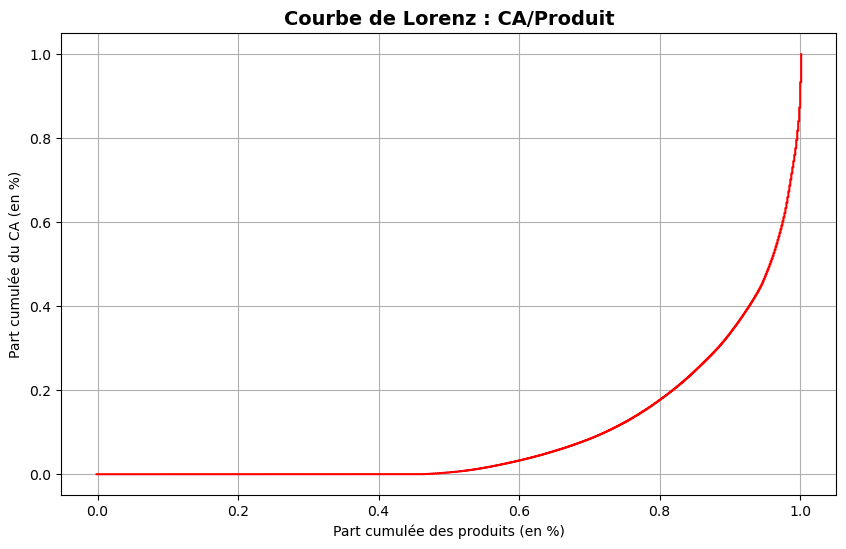

In [53]:
# Courbe de lorenz pour voir la répartition des produits au CA
ca = df_sales_web['ca_product'] # On prend le ca par produit dans une liste

n = len(ca) # On prend la longueur de notre echantillon
lorenz = np.cumsum(np.sort(ca))/ca.sum() # On cumule le ca un par un et on divise par la somme pour arriver à 1, on prend le ca dans l'odre croissant, retourne une liste avec la somme cumulée
lorenz = np.append([0], lorenz) # La courbe de Lorenz commence à 0
  
xaxis = np.linspace(0-1/n, 1+1/n, n+1) # Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n (start, stop, step)

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True)
# ax.fill(xaxis, lorenz) # Remplissage par rapport la bissectrice

plt.plot(xaxis, lorenz, drawstyle = 'steps-post', color = 'red')
plt.plot(1, 1)
plt.xlabel('Part cumulée des produits (en %)')
plt.ylabel('Part cumulée du CA (en %)')
plt.title('Courbe de Lorenz : CA/Produit', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [54]:
# 50% du CA est fait par 90% des produits
# 50% des produits font env 15% du CA
# On pourrait voir aussi la répartition des ventes par produits
# 40% des produits ne sont pas vendu
# Voir ou niveau des stock ce qui est dedans et ne se vend

In [55]:
# Indice de gini (à approfondir pour explication, mais on vois qu'il n'est pas de 0.5, donc de répartition parfaite)
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('Indice de gini :', round(gini, 2))

Indice de gini : 0.81


In [56]:
# Sortir stats sur prix et CA (moyenne, médian, ecart type) ATTENTION on ne prend que les produits ayants des ventes

In [57]:
# Uniquement ou on a eu des ventes
print('CA moyen :', df_graph['ca_product'].mean())
print('CA médian :', df_graph['ca_product'].median())
print('Ecart type sur CA :', df_graph['ca_product'].std())

CA moyen : 183.29506493506494
CA médian : 81.6
Ecart type sur CA : 400.3240726944943


In [58]:
# Uniquement ou on a eu des ventes
print('Prix moyen :', df_graph['price'].mean())
print('Prix médian :', df_graph['price'].median())
print('Ecart type sur prix :', df_graph['price'].std())

Prix moyen : 26.581428571428557
Prix médian : 19.0
Ecart type sur prix : 24.93452962229525


In [59]:
# On ne prend que les produits qui ont eu des ventes
df = df_sales_web.loc[df_sales_web['total_sales'] > 0].copy()

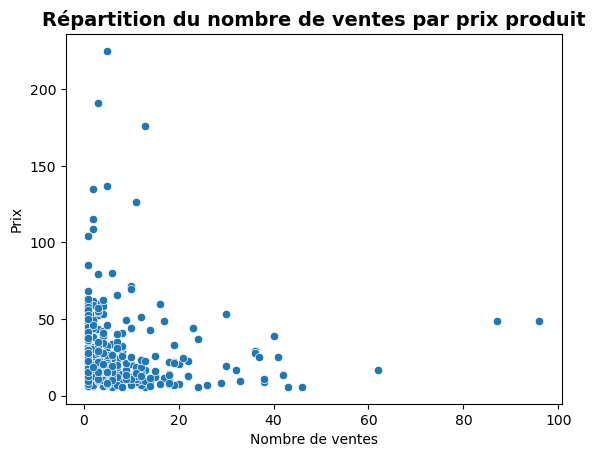

In [60]:
# Refaire le graph en enlevant tout ce qui est ventes = 0
sns.scatterplot(data = df, x = 'total_sales', y = 'price') # Prix selon index du produit
# plt.legend(labels = ['Z-Score < 2', 'Z-Score >= 2'], labelcolor = ['blue', 'red'])
plt.xlabel('Nombre de ventes')
plt.ylabel('Prix')
plt.title('Répartition du nombre de ventes par prix produit', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()

##### *2.2.2. Etat des stocks*

In [61]:
# Etat des stocks des produits en ligne

In [62]:
df_sales_web.loc[df_sales_web['stock_quantity'] == 0]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product
0,3847,1,24.2,0,outofstock,15298,both,6.0,taxable,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product,both,145.2
1,3849,1,34.3,0,outofstock,15296,both,0.0,taxable,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product,both,0.0
2,3850,1,20.8,0,outofstock,15300,both,0.0,taxable,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product,both,0.0
3,4032,1,14.1,0,outofstock,19814,both,3.0,taxable,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,product,both,42.3
4,4039,1,46.0,0,outofstock,19815,both,0.0,taxable,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,product,both,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,6570,1,29.2,0,outofstock,15706,both,0.0,taxable,2020-01-03 16:42:53,Decelle-Villa Marsannay Les Longeroies 2015,decelle-villa-marsannay-longeroies-2015,2020-03-04 13:40:13,product,both,0.0
675,6572,1,44.0,0,outofstock,15704,both,0.0,taxable,2020-01-03 16:46:47,Decelle-Villa Saint-Aubin 1er Cru Sous Roche D...,decelle-villa-saint-aubin-dumay-2015,2020-02-08 09:00:14,product,both,0.0
678,6578,1,40.0,0,outofstock,15647,both,7.0,taxable,2020-01-04 10:02:37,Saumaize-Michelin Pouilly-Fuissé Ampélopsis 2016,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,2020-05-24 09:17:20,product,both,280.0
701,6751,1,46.5,0,outofstock,16144,both,0.0,taxable,2020-03-10 14:03:32,Château Simone Palette Blanc 2017,chateau-simone-blanc-2017,2020-08-27 09:30:14,product,both,0.0


##### *2.2.3. Gamme produits*

In [63]:
# Regarder la distri des prix
# Catégorisation des gammes de produits sur export ventes en ligne

In [64]:
df_test = df_sales_web.copy()
df_test['price'] = df_test['price'].astype(float)

In [65]:
# Réflexion à la categ de la gamme rapport au prix
def categ(row):
    if row['price'] <= 20:
        cat = 'enter'
    elif (row['price'] > 20) & (row['price'] <= 50):
        cat = 'middle'
    elif (row['price'] > 50) & (row['price'] <= 100):
        cat = 'high'
    else:
        cat = 'extra'
    return cat

df_test['categ'] = df_test.apply(categ, axis = 1)

In [66]:
df_test.loc[df_test['categ'] == 'extra'].head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product,categ
199,4352,1,225.0,0,outofstock,15940,both,5.0,taxable,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,product,both,1125.0,extra
201,4355,1,126.5,2,instock,12589,both,11.0,taxable,2018-03-02 10:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,product,both,1391.5,extra
218,4402,1,176.0,8,instock,3510,both,13.0,taxable,2018-03-22 11:21:05,Cognac Frapin VIP XO,cognac-frapin-vip-xo,2020-08-22 11:35:03,product,both,2288.0,extra
219,4404,1,108.5,2,instock,3507,both,2.0,taxable,2018-03-22 11:32:55,Cognac Frapin Château de Fontpinot XO,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,product,both,217.0,extra
221,4406,1,157.0,3,instock,7819,both,0.0,taxable,2018-03-22 11:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,product,both,0.0,extra


{'Enter': 0.42997198879551823, 'Middle': 0.3907563025210084, 'High': 0.14425770308123248, 'Extra': 0.0350140056022409}
Enter     0.429972
Middle    0.390756
High      0.144258
Extra     0.035014
dtype: float64


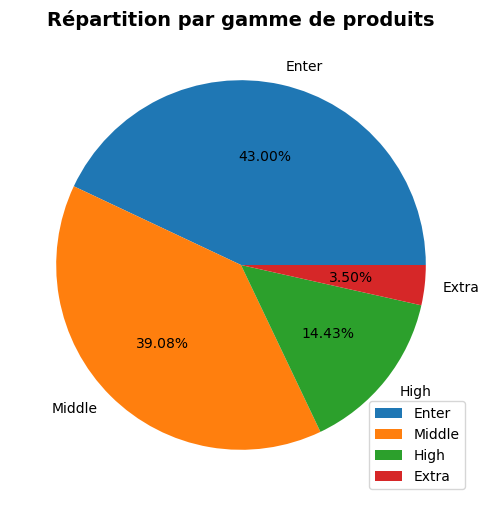

In [67]:
# Répartition gamme de produits (version beta)
test = df_test['categ'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(10, 6))

data_dict = dict(zip(['Enter', 'Middle', 'High', 'Extra'],  test)) # Mise des données sous  forme de dico
print(data_dict)
data_plot = pd.Series(data_dict)
print(data_plot)

plt.pie(data_plot, autopct='%1.2f%%', shadow=False, labels = data_plot.index) # Paramètrage du graphe, autopct pour avoir les valeur dans le graphe
plt.legend(loc='lower right')

plt.title('Répartition par gamme de produits', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()


#### *2.3. Outliers*

In [68]:
# Recherche des outliers prix sur les produits du site web

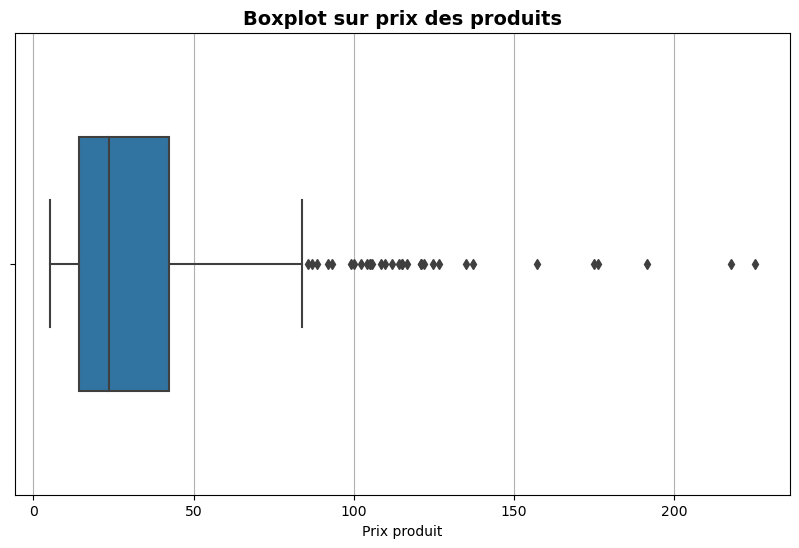

In [69]:
# Pour avoir une idée on fait un boxplot sur les prix
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(True)

sns.boxplot(data=df_sales_web, x = 'price', orient="h", width=0.55)

plt.xlabel('Prix produit')
plt.title('Boxplot sur prix des produits', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.show()

In [70]:
# Z-Score correspond au nb d'écart type de la valeur par rapport à la moyenne
df_outlier = df_sales_web.copy()
df_outlier['zscore'] = stats.zscore(df_sales_web['price'], axis=0) # Utilisitaion de scipy pour le calcul
# On passe le zscore en valeur absolue
df_outlier['zscore'] = df_outlier['zscore'].apply(lambda x: abs(x))

In [71]:
df_outlier

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product,zscore
0,3847,1,24.2,0,outofstock,15298,both,6.0,taxable,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product,both,145.2,0.298410
1,3849,1,34.3,0,outofstock,15296,both,0.0,taxable,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product,both,0.0,0.065016
2,3850,1,20.8,0,outofstock,15300,both,0.0,taxable,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product,both,0.0,0.420752
3,4032,1,14.1,0,outofstock,19814,both,3.0,taxable,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,product,both,42.3,0.661837
4,4039,1,46.0,0,outofstock,19815,both,0.0,taxable,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,product,both,0.0,0.486015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,1,8.4,83,instock,16135,both,5.0,taxable,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,product,both,42.0,0.866939
710,7023,1,27.5,15,instock,15891,both,0.0,taxable,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,product,both,0.0,0.179667
711,7025,1,69.0,2,instock,15887,both,0.0,taxable,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,product,both,0.0,1.313620
712,7247,1,54.8,23,instock,13127-1,both,0.0,taxable,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,product,both,0.0,0.802664


In [72]:
df_outlier['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

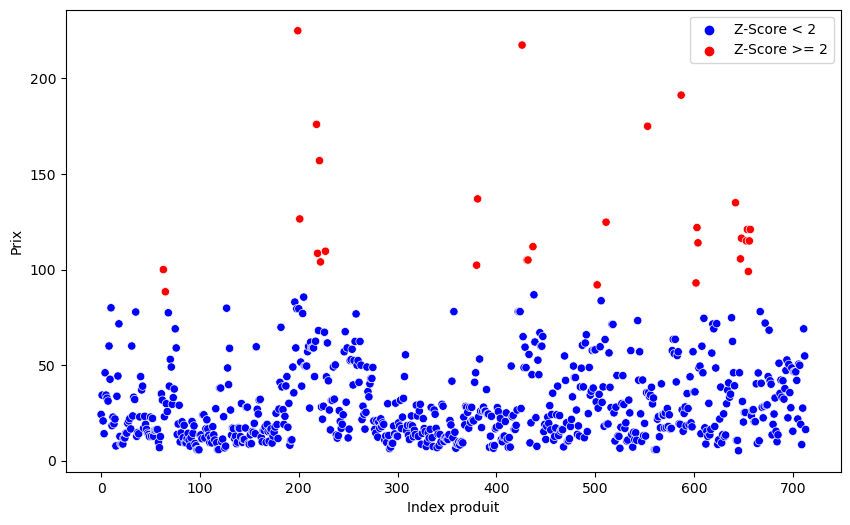

In [73]:
# Visu des outliers, choix des outliers
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['Z-Score >= 2' if x >= 2 else 'Z-Score < 2' for x in df_outlier['zscore']]

sns.scatterplot(data = df_outlier, x = df_outlier.index, y = 'price', hue = colors, palette = ['blue', 'red']) # Prix selon index du produit
# plt.legend(labels = ['Z-Score < 2', 'Z-Score >= 2'], labelcolor = ['blue', 'red'])
plt.xlabel('Index produit')
plt.ylabel('Prix')
plt.show()

In [74]:
# Récupérer la liste des outliers

In [75]:
# Produit ayants un zscore >= 2 l'écart type
print('Produits à vérifier :')
df_outlier.loc[df_outlier['zscore'] >= 2].sort_values(by = 'zscore', ascending = False).head()

Produits à vérifier :


,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product,zscore
199,4352,1,225.0,0,outofstock,15940,both,5.0,taxable,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,product,both,1125.0,6.926939
426,5001,1,217.5,20,instock,14581,both,0.0,taxable,2018-07-17 09:45:39,David Duband Charmes-Chambertin Grand Cru 2014,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,product,both,0.0,6.657068
587,5892,1,191.3,10,instock,14983,both,3.0,taxable,2019-03-28 10:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,product,both,573.9,5.714318
218,4402,1,176.0,8,instock,3510,both,13.0,taxable,2018-03-22 11:21:05,Cognac Frapin VIP XO,cognac-frapin-vip-xo,2020-08-22 11:35:03,product,both,2288.0,5.163781
553,5767,1,175.0,12,instock,15185,both,0.0,taxable,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,product,both,0.0,5.127798


In [76]:
df_out = df_outlier.loc[df_outlier['zscore'] >= 2].sort_values(by = 'zscore', ascending = False)
print('Nombre outliers :', len(df_out))

Nombre outliers : 30


In [77]:
df_out.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,indic1,total_sales,tax_status,post_date,post_title,post_name,post_modified,post_type,indic2,ca_product,zscore
199,4352,1,225.0,0,outofstock,15940,both,5.0,taxable,2018-03-02 10:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,product,both,1125.0,6.926939
426,5001,1,217.5,20,instock,14581,both,0.0,taxable,2018-07-17 09:45:39,David Duband Charmes-Chambertin Grand Cru 2014,david-duband-charmes-chambertin-grand-cru-2014,2020-05-16 09:00:05,product,both,0.0,6.657068
587,5892,1,191.3,10,instock,14983,both,3.0,taxable,2019-03-28 10:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,product,both,573.9,5.714318
218,4402,1,176.0,8,instock,3510,both,13.0,taxable,2018-03-22 11:21:05,Cognac Frapin VIP XO,cognac-frapin-vip-xo,2020-08-22 11:35:03,product,both,2288.0,5.163781
553,5767,1,175.0,12,instock,15185,both,0.0,taxable,2019-03-13 14:43:22,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,product,both,0.0,5.127798


In [78]:
# Merci de votre attention